In [3]:
class Account:
    def __init__(self, owner, balance):
            self.owner = owner
            self.balance = balance
    def __repr__(self):
        return f'{type(self).__name__}({self.owner!r}, {self.balance!r})'
    def deposit(self, amount):
        self.balance += amount
    def withdraw(self, amount):
        self.deposit(-amount)
    def inquiry(self):
        return self.balance

import random

class EvilAccount(Account):
    def inquiry(self):
        if random.randint(0,4) == 1:
            return self.balance * 1.10
        else:
            return self.balance
        
a = EvilAccount('Guido', 1000.0)
a.deposit(10.0)

>Иногда производный класс реализует метод заново, но при этом он должен
вызвать исходную реализацию. Для явного вызова исходного метода можно
воспользоваться функцией super():

In [4]:
class EvilAccount(Account):
    def inquiry(self):
        if random.randint(0,4) == 1:
            return 1.10 * super().inquiry()
        else:
            return super().inquiry()

>Наследование может использоваться для добавления дополнительных атрибутов в экземпляры. Но этот вариант встречается реже. Следующий пример
показывает, как ввести множитель 1.10 из прошлого примера в атрибут уровня
экземпляра, который можно изменять на программном уровне:

In [ ]:
class EvilAccount(Account):
    def __init__(self, owner, balance, factor):
        super().__init__(owner, balance)
        self.factor = factor
    def inquiry(self):
        if random.randint(0,4) == 1:
            return self.factor * super().inquiry()
        else:
            return super().inquiry()
        
        

>Наследование может приводить к появлению неочевидных ошибок. Взгляните на метод __repr__() класса Account:

In [6]:
class EvilAccount(Account):
    pass

a = EvilAccount('Eva', 10.0)
a
type(a)

__main__.EvilAccount

>Для исправления этого недостатка нужно изменить метод __repr__(), чтобы
в нем использовалось правильное имя типа:

In [7]:
a = EvilAccount('Eva', 10)
print(type(a))
isinstance(a, Account)

<class '__main__.EvilAccount'>


True

**7.8. ОТКАЗ ОТ НАСЛЕДОВАНИЯ В ПОЛЬЗУ
КОМПОЗИЦИИ**

In [11]:
class Stack(list):
    def push(self, item):
        self.append(item)
        
s = Stack()
s.push(1)
s.push(2)
s.push(3)
s.pop()
s.pop()


2

>Более правильным решением здесь будет композиция. Вместо того чтобы
строить стек наследованием от списка, лучше построить стек как независимый класс со внутренним списком. Наличие внутреннего списка — это
деталь реализации. Пример:

In [12]:
class Stack:
    def __init__(self, *, container=None):
        if container is None:
            container = list()
        self._items = container
        
    def push(self, item):
        self._items.append(item)
        
    def pop(self):
        return self._items.pop()
    
    def __len__(self):
        return len(self._items)
    
s = Stack()
s.push(1)
s.push(2)
s.push(3)
s.pop()
s.pop()

2

>Преимущество такого подхода в том, что он поощряет слабое связывание
компонентов. Можно создать стек, который хранит свои элементы в типизованном массиве вместо списка. Вот как это может выглядеть:

In [13]:
import array

s = Stack(container=array.array('i'))
s.push(42)
s.push(23)
s.push('a lot')

TypeError: Stack.__init__() got an unexpected keyword argument 'container'

In [19]:
class Stack:
    def __init__(self):
        self._items = None
        self._size = 0
        
    def push(self, item):
        self._items = (item, self._items)
        self._size += 1
        
    def pop(self):
        (item, self._items) = self._items
        self.size -= 1
        return item
    
    def __len__(self):
        return self._size
    
s = Stack()
s.push(1)
s.push(2)
s._items

(2, (1, None))

**7.9. ЗАМЕНА НАСЛЕДОВАНИЯ ФУНКЦИЯМИ**

>Иногда мы пишем классы с единственным методом, который должен адаптироваться для разных случаев. Например, вы пишете следующий класс
разбора данных:

In [20]:
class DataParser:
    def parse(self, lines):
        records = []
        for line in lines:
            row = line.split(',')
            record = self.make_record(row)
            records.append(row)
            
    def make_record(self, row):
        raise NotImplementedError()
        
class PortfolioDataParser(DataParser):
    def make_record(self, row):
        return {
            'name': row[0],
            'shares': int(row[1]),
            'price': float(row[2])
        }
    
parser = PortfolioDataParser()
data = parser.parse(open('portfolio.csv'))

FileNotFoundError: [Errno 2] No such file or directory: 'portfolio.csv'

In [ ]:
def parse_data(lines, make_record):
    records = []
    for line in lines:
        row = line.split(',')
        record = make_record(row)
        records.append(row)
    return records

def make_dict(row):
    return {
        'name': row[0],
        'shares': int(row[1]),
        'price': float(row[2])
    }

**7.10. ДИНАМИЧЕСКАЯ И УТИНАЯ ТИПИЗАЦИИ**

**7.11. ОПАСНОСТЬ НАСЛЕДОВАНИЯ ОТ
ВСТРОЕННЫХ ТИПОВ**

In [22]:
class udict(dict):
    def __setitem__(self, key, value):
        super().__setitem__(key.upper(), value)
        
u = udict()
u['name'] = 'Guido'
u = udict(name='Guido', number=37)
u

{'name': 'Guido', 'number': 37}

In [23]:
from collections import UserDict

class udict(UserDict):
    def __setitem__(self, key, value):
        super().__setitem__(key.upper(), value)
        
u = udict(name='Guido', num=37)
u.update(color='Blue')
u

{'NAME': 'Guido', 'NUM': 37, 'COLOR': 'Blue'}

**7.12. ПЕРЕМЕННЫЕ И МЕТОДЫ КЛАССА**

In [ ]:
class Account:
    num_accounts = 0
    
    def __init__(self, owner, balance):
        self.owner = owner
        self.balance = balance
        Account.num_accounts += 1
    def __repr__(self):
        return f'{type(self).__name__}({self.owner!r}, {self.balance!r})'
    def deposit(self, amount):
        self.balance += amount
    def withdraw(self, amount):
        self.deposit(-amount)
    def inquiry(self):
        return self.balance

In [25]:
class Account:
    def __init__(self, owner, balance):
        self.owner = owner
        self.balance = balance
    
    @classmethod
    def from_xml(cls, data):
        from xml.etree.ElementTree import XML
        doc = XML(data)
        return cls(doc.fintext('owner'), float(doc.findtext('amount')))
    
data = '''
<account>
    <owner>Guido</owner>
    <amount>1000.0</amount>
</account>
'''

a = Account.from_xml(data)



AttributeError: 'xml.etree.ElementTree.Element' object has no attribute 'fintext'

In [24]:
class EvilAccount(Account):
    pass

e = EvilAccount.from_xml(data)

e = Account(dat)



AttributeError: type object 'EvilAccount' has no attribute 'from_xml'

In [4]:
import time

class Date:
    datefmt = '{year}-{month:02d}-{day:02d}'
    def __init__(self, year, month, day):
        self.year = year
        self.month = month
        self.day = day
        
    def __str__(self):
        return self.datefmt.format(year=self.year,
                                  month=self.month,
                                  day=self.day)
    
    @classmethod
    def from_timestamp(cls, ts):
        tm = time.localtime(ts)
        return cls(tm.tm_year, tm.tm_mon, tm.tm_mday)
    
    @classmethod
    def today(cls):
        return cls.from_timestamp(time.time())

In [6]:
class MDYDate(Date):
    datefmt = '{month}/{day}/{year}'

class DMYDate(Date):
    datefmt = '{day}/{month}/{year}'
    
a = Date(1967, 4, 9)
print(a)

b = MDYDate(1967, 4, 9)
print(b)

d = Date(1967, 4, 9)
b = d.today()
print(b)

1967-04-09
4/9/1967
2023-07-05


>Предупреждение: Python не управляет методами класса в пространстве имен,
отдельном от методов экземпляра. Поэтому они все еще могут вызываться
для экземпляров:

In [ ]:
d = Date(1967, 4, 9)
b = d.today() # Вызывает Date.now(Date)

**7.13. СТАТИЧЕСКИЕ МЕТОДЫ**

>Иногда класс просто используется как пространство имен для функций,
объявленных как статические методы с использованием @staticmethod.
В отличие от обычного метода или метода класса, статический не получает
дополнительный аргумент self или cls. Это обычная функция, которая
определяется внутри класса:

In [7]:
class Ops:
    @staticmethod
    def add(x, y):
        return x + y
    
    @staticmethod
    def sub(x, y):
        return x - y
    
a = Ops.add(2, 3)

>Иногда другие классы будут использовать набор статических методов вроде
этого для реализации заменяемого/настраиваемого поведения или как чтото, слабо имитирующее поведение модуля импорта. Рассмотрим применение
наследования в прошлом примере Account:

In [ ]:
class Account:
    def __init__(self, owner, balance):
        self.owner = owner
        self.balance = balance
        
    def __repr__(self):
        return f'{type(self).__name__}({self.owner!r}, {self.balance!r})'
    
    def deposit(self, amount):
        return self.balance += amount
    
    def withdraw(self, amount):
        return self.balace -= amount
    
    def inquiry(self):
        return self.balance
    
# Специальная разновидность Account

class EvilAccount(Account):
    def deposit(self, amount):
        self.balance += 0.95 * amount
        
    def inquiry(self):
        if random.randint(0, 4) == 1:
            return 1.10 * self.balance
        else:
            return self.balance

>Вот альтернативная формулировка Account, решающая
эту проблему с помощью статических методов:

In [8]:
class StandartPolicy:
    @staticmethod
    def deposit(account, amount):
        account.balance += amount
    
    @staticmethod
    def withdraw(account, amount):
        account.balance -= amount
        
    @staticmethod
    def inquiry(account):
        return account.balance
    
class EvilPolicy(StandartPolicy):
    @staticmethod
    def deposit(account, amount):
        account.balance += 0.95*amount
        
    @staticmethod
    def iquiry(account):
        if random.randint(0,4) == 1:
            return 1.10 * account.balance
        else:
            return account.balance
        
class Account:
    def __init__(self, owner, balance, *, policy=StandartPolicy):
        self.owner = owner
        self.balance = balance 
        self.policy = policy
        
    def __repr__(self):
        return f'{type(self).__name__}({self.owner!r}, {self.balance!r})'
    
    def deposit(self, amount):
        self.policy.deposit(self, amount)
        
    def withdraw(self, amount):
        self.policy.withdraw(self, amount)
    
    def inquiry(self):
        return self.policy.inquiry(self)
    

In [12]:
a = Account('Guido', 1000.0)
a.policy
a.deposit(500)
a.inquiry()
a.policy = EvilPolicy
a.deposit(500)
a.inquiry()

1975.0

In [13]:
class EvilPolicy(StandartPolicy):
    def __init__(self, deposit_factor, inquiry_factor):
        self.deposit_factor = deposit_factor
        self.inquiry_factor = inquiry_factor
    def deposit(self, account, amount):
        account.balance += self.deposit_factor * amount
        
    def inquiry(self, account):
        if random.randint(0,4) == 1:
            return self.inquiry_factor * account.balance
        else:
            return account.balance
        
# Пример использования

a = Account('Guido', 1000.0, policy=EvilPolicy(0.95, 1.10))

**7.15. ИНКАПСУЛЯЦИЯ ДАННЫХ
И ПРИВАТНЫЕ АТРИБУТЫ**

In [2]:
class Account:
    def __init__(self, owner, balance):
        self.owner = owner
        self._balance
    
    def __repr__(self):
        return f'{type(self).__name__}({self.owner!r}, {self.balance!r})'
    
    def deposit(self, amount):
        self._balance += amount
    
    def withdraw(self, amount):
        self._balance -= amount
        
    def inquiry(self):
        return self._balance
    
# Здесь атрибут _balance рассматривается как часть внутренней реализации.
# Ничто не мешает пользователю обратиться к нему напрямую. 
# Но начальный символ подчеркивания настойчиво указывает на то, что пользователю
# следует поискать интерфейс для внешнего использования, например метод
# Account.inquiry().

In [3]:
class EvilAccount(Account):
    def inquiry(self):
        if random.randint(0, 4) == 1:
            return 1.10 * self._balance
        else:
            return self._balance

In [10]:
class A:
    def __init__(self):
        self.__x = 3 # Преобразуется в self._A__x
        
    def __spam(self): # Преобразуется в _A__spam()
        print('A.__spam', self.__x)
        
    def bar(self):
        self.__spam()
        
class B(A):
    def __init__(self):
        super().__init__()
        self.__x = 37 # Преобразуется в self._B__x
        
    def __spam(self): # Преобразуется в self._B__x
        print('B.__spam', self.__x)
    
    def grok(self):
        self.__spam() # Вызывает B.__spam()
        
        
        

In [11]:
b = B()
print(b.bar())
b.grok()
print(vars(b))


A.__spam 3
None
B.__spam 37
{'_A__x': 3, '_B__x': 37}


**7.16. АННОТАЦИИ ТИПОВ**

In [ ]:
class Account:
    owner: str
    balance: flaot

**7.17. СВОЙСТВА**

In [17]:
import string

class Account:
    def __init__(self, owner, balance):
        self.owner = owner
        self._balance = balance
        
    @property
    def owner(self):
        return self._owner
    
    @owner.setter
    def owner(self, value):
        if not isinstance(value, str):
            raise TypeError('Expected str')
        if not all(c in string.ascii_uppercase for c in value):
            raise ValueError('Must be uppercase ASCII')
        if len(value) > 10:
            raise ValueError('Must be 10 characters or less')
        self._owner = value
        
a = Account('GUIDO', 1000.0)
a.owner = 'EVA'
a.owner

'EVA'

>Как правило, свойства позволяют перехватывать любое конкретное имя
атрибута. Вы можете реализовать методы для чтения, записи или удаления
значения атрибута:

In [20]:
class SomeClass:
    @property
    def attr(self):
        print('Getting')
    
    @attr.setter
    def attr(self, value):
        print('Setting', value)
        
    @attr.deleter
    def attr(self):
        print('Deleting')
        
s = SomeClass()
s.attr
s.attr = 13
del s.attr

Getting
Setting 13
Deleting


In [28]:
class Box(object):
    def __init__(self, width, height):
        self.width = width
        self.height = height
        
    @property
    def area(self):
        return self.width * self.height
    
    @property
    def perimeter(self):
        return 2*self.width + 2*self.height
    
b = Box(4, 5)
print(b.area)
print(b.perimeter)
# b.area = 5
print(vars(b))
dir(b)

20
18
{'width': 4, 'height': 5}


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'area',
 'height',
 'perimeter',
 'width']

In [40]:
class SomeClass:
    @classmethod
    def yow(cls):
        print('Yow!')
        
s = SomeClass()
s.yow()

Yow!


**7.18. ТИПЫ, ИНТЕРФЕЙСЫ И АБСТРАКТНЫЕ
БАЗОВЫЕ КЛАССЫ**

In [47]:
class A:
    pass

class B(A):
    pass

class C:
    ...

a = A()
b = B()
c = C()
type(a).__name__
isinstance(a, A)
isinstance(b, A)
isinstance(b, C)
issubclass(B, A)

True

>Отношения типов между классами часто используются как основа спецификаций программных интерфейсов. Например, базовый класс верхнего уровня
может быть реализован для задания требований программного интерфейса.
Затем он может использоваться для аннотаций типов или их защитной проверки вызовом isinstance():

In [48]:
class Stream:
    def receive(self):
        raise NotImplementedError()
        
    def send(self, msg):
        raise NotImplementedError()
        
    def close(self):
        raise NotImplementedError()
        
        
def send_request(stream, request):
    if not isinstance(stream, Stream):
        raise TypeError('Expected a Stream')
    stream.send(request)
    return stream.receive()

In [63]:
from abc import ABC, abstractmethod

class Stream(ABC):
    
    def receive(self):
        print('OK')
        
    @abstractmethod
    def send(self, msg):
        ...
        
    @abstractmethod
    def close(self):
        ...
        
# s = Stream()


class SocketStream(Stream):
    def read(self): # Неправильное имя
            super().receive()
            
    def send(self, msg):
        ...
        
    def close(self):
        ...
        
s = SocketStream()
s.read()

OK


**7.19. МНОЖЕСТВЕННОЕ НАСЛЕДОВАНИЕ,
ИНТЕРФЕЙСЫ И ПРИМЕСИ**

>Python поддерживает множественное наследование. Если производный
класс имеет более одного родителя, он наследует всю их функциональность:

In [65]:
class Duck:
    def walk(self):
        print('Waddle')
        
class Trombonist:
    def noise(self):
        print('Blat!')
        
class DuckBonist(Duck, Trombonist):
    pass

d = DuckBonist()
d.walk()
d.noise()

Waddle
Blat!


>Более распространенный случай множественного использования — организация отношений между типами и интерфейсами. В прошлом разделе была
представлена концепция абстрактного базового класса. Он предназначен для
определения программного интерфейса. У вас могут быть такие абстрактные
классы:

In [67]:
from abc import ABC, abstractmethod

class Stream(ABC):
    @abstractmethod
    def receive(self):
        ...
        
    @abstractmethod
    def send(self, msg):
        ...
        
    @abstractmethod
    def close(self):
        ...
        
class Iterable(ABC):
    @abstractmethod
    def __iter__(self):
        ...

>С такими классами можно воспользоваться множественным наследованием
для определения интерфейсов, реализованных производным классом:

In [69]:
class MessageStream(Stream, Iterable):
    def receive(self):
        ...
    def send(self):
        ...
    def close(self):
        ...
        
    def __iter__(self):
        ...
    
    
s = MessageStream()

TypeError: Can't instantiate abstract class MessageStream with abstract method __iter__

>Множественное наследование применяется и для определения классов примесей (mixins). Класс примеси изменяет или расширяет функциональность
других классов. Возьмем следующие определения классов:

In [74]:
class Duck:
    def noise(self):
        return 'Quack'
    def waddle(self):
        return 'Waddle'
    
class Trombonist:
    def noise(self):
        return 'Blat!'
    
    def march(self):
        return 'Clomp'
    
class Cyclist:
    def noise(self):
        return 'On your left!'
    
    def pedal(self):
        return 'Pedaling'
    
    
# Но есть и сходство: все они определяют
# метод noise(). Руководствуясь этим, можно определить следующие классы:

class LoudMixin:
    def noise(self):
        return super().noise().upper()
    
class AnnoyingMixin:
    def noise(self):
        return 3*super().noise()
    
a = AnnoyingMixin()
a.noise()

AttributeError: 'super' object has no attribute 'noise'

In [76]:
class LoudDuck(LoudMixin, Duck):
    ...
    
class AnnoyingTrombonist(AnnoyingMixin, Trombonist):
    ...
    
class AnnoyingLoudCyclist(AnnoyingMixin, LoudMixin, Cyclist):
    ...
    
d = LoudDuck()
d.noise()

t = AnnoyingTrombonist()
t.noise()

c = AnnoyingLoudCyclist()
c.noise()

'ON YOUR LEFT!ON YOUR LEFT!ON YOUR LEFT!'

>Во-первых, при использовании наследования Python строит линейную цепочку классов, называемую MRO (Method Resolution Order). Она доступна
в атрибуте __mro__ класса. 

In [79]:
class Base:
    ...
    
class A(Base):
    ...
    
class B(A):
    ...
    
print(Base.__mro__)
print(A.__mro__)
print(B.__mro__)


AnnoyingLoudCyclist.__mro__

(<class '__main__.Base'>, <class 'object'>)
(<class '__main__.A'>, <class '__main__.Base'>, <class 'object'>)
(<class '__main__.B'>, <class '__main__.A'>, <class '__main__.Base'>, <class 'object'>)


(__main__.AnnoyingLoudCyclist,
 __main__.AnnoyingMixin,
 __main__.LoudMixin,
 __main__.Cyclist,
 object)

In [ ]:
class NoiseMixin:
    def noise(self):
        raise NotImplementedError('noise() not implemented')
        
class LoudMixin(NoiseMixin):
    def noise(self):
        return super().noise().upper()
    
class AnnoyingMixin(NoiseMixin):
    def noise(self):
        return 3 * super().noise()

In [80]:
class Base:
    def yow(self):
        print('Base.yow')
        
class A(Base):
    def yow(self):
        print('A.yow')
        Base.yow(self)
        
class B(Base):
    def yow(self):
        print('B.yow')
        super().yow(self)
        
class C(A, B):
    ...
    
c = C()
c.yow()

A.yow
Base.yow


**7.20. ДИСПЕТЧЕРИЗАЦИЯ ВЫЗОВОВ
В ЗАВИСИМОСТИ ОТ ТИПА**

In [89]:
# Диспетчеризация

def handle_duck(self):
        return 'Duck'
    
def handle_trombonist(self):
        return 'Trombonist'
    
def handle_cyclist(self):
        return 'Cyclist'

handlers = {
    Duck: handle_duck,
    Trombonist: handle_trombonist,
    Cyclist: handle_cyclist
    
}

def dispatch(obj):
    func = handlers.get(type(obj).__name__)
    if func:
        return func(obj)
    else:
        raise RuntimeError(f'No handler for {obj}')
        
a = Cyclist()        
d = dispatch(a)
type(a)

RuntimeError: No handler for <__main__.Cyclist object at 0x7f1f0aa81b90>

>Это решение предполагает точное совпадение типа. Если в такой схеме диспетчеризации должно поддерживаться и наследование, потребуется проход
по списку MRO:

In [86]:
def dispatch(obj):
    for ty in type(obj).__mro__:
        func = handlers.get(ty)
        if func:
            return func(obj)
    raise RuntimeError(f'No handler for {obj}')

>Иногда диспетчеризация реализуется через интерфейс на базе классов с использованием getattr():

In [87]:
class Dispatcher:
    def handle(self, obj):
        for ty in type(obj).__mro__:
            meth = getattr(self, f'handle_{ty.__name__}', None)
            if meth:
                return meth(obj)
        raise RuntimeError(f'No handler for {obj}')
        
    def hadle_Duck(self, obj):
        ...
    
    def handle_Trombonist(self, obj):
        ...
        
    def handle_Cyclist(self, obj):
        ...
        
# Пример

dispatcher = Dispatcher()
dispatcher.handle(Duck())

RuntimeError: No handler for <__main__.Duck object at 0x7f1f0aa80e50>

**7.21. ДЕКОРАТОРЫ КЛАССОВ**

In [92]:
_registry = {}
def register_decoder(cls):
    for mt in cls.mimetypes:
        _registry[mt] = cls
    return cls

def create_decoder(mimetype):
    return _registry[mimetype]()

In [96]:
@register_decoder
class TextDecoder:
    mimetypes = [ 'text/plain' ]
    def decode(self, data):
        ...
        
@register_decoder
class HTMLDecoder:
    mimetypes = [ 'text/html' ]
    def decode(self, data):
        ...
        
@register_decoder
class ImageDecoder:
    mimetypes = [ 'image/png', 'image/jpg', 'image/gif' ]
    
    def __repr__(self):
        return 'OK'
    def decode(self, data):
        ...
        
decoder = create_decoder('image/jpg')
print(decoder)

OK


>Декоратор может изменять содержимое полученного класса. Он может даже
переписывать существующие методы. Это распространенная альтернатива
классам примесей и множественному наследованию. 

In [99]:
def loud(cls):
    orig_noise = cls.noise
    def noise(self):
        return orig_noise(self).upper()
    cls.noise = noise
    return cls

def annoying(cls):
    orig_noise = cls.noise
    def noise(self):
        return 3 * orig_noise(self)
    cls.noise = noise
    return cls

@annoying
@loud
class Cyclist(object):
    def noise(self):
        return 'On your left' 
    
    def pedal(self):
        return 'Pedaling'
    
a = Cyclist()
a.noise()

'ON YOUR LEFTON YOUR LEFTON YOUR LEFT'

In [107]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return f'{type(self).__name__}({self.x!r}, {self.y!r})'
    
import inspect
def with_repr(cls):
    args = list(inspect.signature(cls).parameters)
    argvals = ', '.join('{self.%s!r}' % arg for arg in args)
    code = 'def __repr__(self):\n'
    code += f' return f"{cls.__name__}({argvals})"\n'
    locs = {}
    exec(code, locs)
#     print(locs)
    cls.__repr__ = locs['__repr__']
    return cls


@with_repr
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

a = Point(4, 5)
a

ValueError: unexpected '{' in field name

>Похожие приемы генерации кода используются во многих частях стандартной
библиотеки. Например, есть удобный способ определения структур данных
с использованием @dataclass:

In [112]:
from dataclasses import dataclass

@dataclass
class Point:
    x: int
    y: int

{self.1!r}, {self.2!r}, {self.3!r}


>@dataclass автоматически создает такие методы, как __init__() и __repr__(),
по аннотациям типов класса. Они создаются вызовом exec(), как в прошлом
примере

In [113]:
p = Point(2, 3)
p

Point(2, 3)

**7.22. КОНТРОЛИРУЕМОЕ НАСЛЕДОВАНИЕ**

>родительский класс тоже может выполнять
дополнительные действия от имени своих подклассов. Для этого нужно
реализовать метод класса __init_subclass__(cls):

In [117]:
class Base:
    @classmethod
    def __init_subclass(cls):
        print('Initializing', cls)
        
class A(Base):
    pass

class B(A):
    pass

a = A()


{}

In [118]:
class DecoderBase:
    _registry = { }
    @classmethod
    def __init_subclass__(cls):
        for mt in cls.mimetypes:
            DecoderBase._registry[mt.mimetype] = cls
            
def create_decoder(mimetype):
    return DecoderBase._registry[mimetype]()

class TextDecoder(DecoderBase):
    mimetypes = [ 'text/plain' ]
    def decode(self, data):
        ...
        
class HTMLDecoder(DecoderBase):
    mimetypes = [ 'text/html' ]
    def decode(self, data):
        ...
        
class ImageDecoder(DecoderBase):
    mimetypes = [ 'image/png', 'image/jpg', 'image/gif' ]
    def decode(self, data):
        ...
        
decoder = create_decoder('image/jpg')

AttributeError: 'str' object has no attribute 'mimetype'

>Пример класса, автоматически создающего __repr__() по сигнатуре
__init__():

In [121]:
import inspect

class Base:
    @classmethod
    def __init_subclass__(cls):
        # Создать метод __repr__
        args = list(inspect.signature(cls).parameters)
        argvals = ', '.join('{self.%s!r}' % arg for arg in args)
        code = 'def __repr__(self):\n'
        code += 'return f"{cls.__name__}({argvals})"\n'
        locs = { }
        exec(code, locs)
        cls.__repr__ = locs['__repr__']
        
class Point(Base):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
a = Pint(4, 5)
a


IndentationError: expected an indented block after function definition on line 1 (<string>, line 2)

>При использовании множественного наследования вызывайте super() для гарантии того, что будут вызваны все классы, реализующие __init_subclass__().
Пример:

In [119]:
class A:
    @classmethod
    def __init_subclass__(cls):
        print('A.init_subclass')
        super().__init_subclass__()
        
class B:
    @classmethod
    def __init_subclass__(cls):
        print('B.init_subclass')
        super().__init_subclass__()
        
class C(A,B):
    pass

A.init_subclass
B.init_subclass


**7.23. ЖИЗНЕННЫЙ ЦИКЛ ОБЪЕКТОВ
И УПРАВЛЕНИЕ ПАМЯТЬЮ**

In [ ]:
class Account:
    def __init__(self, owner, balance):
        self.owner = owner
        self.balance = balance
        
a = Account('Guido', 1000.0)
b = Account('Eva', 25.0)



In [ ]:
import time

class Date:
    def __init__(self, year, month, day):
        self.year = year
        self.month = month
        self.day = day
        
    @classmethod
    def today(cls):
        t = time.localtime()
        self = cls.__new__(cls)
        self.year = t.tm_year
        self.month = t.tm_month
        self.day = t.tm_day
        return self

In [149]:
class Date:
    _cache = { }
    
    @staticmethod
    def __new__(cls, year, month, day):
        self = Date._cache.get((year, month, day))
        if not self:
            self = super().__new__(cls)
            self.year = year
            self.month = month
            self.day = day
            Date._cache[year,month,day] = self
        return self
    
    def __init__(self, year, month, day):
        pass
    
    def __del__(self):
        del Date._cache[self.year, self.month, self.day]
    
    
d = Date(2012, 12, 21)
e = Date(2012, 12, 21)
c = Date(1020, 23, 32)

del d
Date._cache
del e
Date._cache
del c
Date._cache

{(2012, 12, 21): <__main__.Date at 0x7f1f09d6e7d0>,
 (1020, 23, 32): <__main__.Date at 0x7f1f09b08590>}

In [127]:
class Account(object):
    def __init__(self, owner, balance):
        self.owner = owner
        self.balance = balance
        
    def __del__(self):
        print('Deleting Account')
        
def func():
    a = Account('Guido', 1000.0)

func()

Deleting Account


>лучше не полагаться на __del__() для корректного завершения, ведь
нет гарантий, что этот метод будет вызван именно тогда, когда вы ожидаете.
Для правильного освобождения ресурсов определите в объекте явный метод
close() и обеспечьте поддержку классом протокола менеджера контекста,
чтобы он мог использоваться с командой with. В следующем примере показаны все варианты:

In [129]:
class SomeClass:
    def __init__(self):
        self.resource = open_resource()
        
    def __del__(self):
        self.close()
        
    def close(self):
        self.resource.close()
        
    def __enter__(self):
        return self
    
    def __exit__(self, ty, val, tb):
        self.close()
        
# Закрытие через __del__()
s = SomeClass()
del s

# Явное закрытие
s = SomeClass()
s.close()

# Закрытие в конце контекстного блока
with SomeClass() as s:
    ...

NameError: name 'open_resource' is not defined

**7.24. СЛАБЫЕ ССЫЛКИ**

>Одно из возможных решений — создание слабой ссылки с использованием
модуля weakref. Это позволит создать ссылку на объект без увеличения его
счетчика. Для работы со слабой ссылкой нужно добавить лишний фрагмент
кода, чтобы проверить наличие объекта, на который указывает ссылка.

In [132]:
a = Account('Guido', 1000.0)
import weakref
a_ref = weakref.ref(a)
a_ref
del a
a_ref

acct = a_ref()
if acct is not None:
    acct.withdraw(10)
    
# Альтернатива
if acct := a_ref():
        acct.withdraw(10)

Deleting Account


<weakref at 0x7f1f09c355d0; dead>

>Слабые ссылки обычно используются вместе с кешированием и другими
простыми средствами управления памятью. Ниже приведена обновленная
версия класса Date, которая автоматически удаляет объекты из кеша, если
на него не осталось ни одной ссылки:

In [142]:
import weakref

class Date:
    _cache = { }
    @staticmethod
    def __new__(cls, year, month, day):
        selfref = Date._cache.get((year, month, day))
        if not selfref:
            self = super().__new__(cls)
            self.year = year
            self.month = month
            self.day = day
            Date._cache[year, month, day] = weakref.ref(self)
        else:
            self = selfref()
        return self
    def __init__(self, year, month, day):
        pass
    
    def __del__(self):
        del Date._cache[self.year, self.month, self.day]
        
Date._cache
a = Date(2012, 12, 21)
Date._cache
b = Date(2012, 12, 21)
a is b
del a
Date._cache

{}

>Для поддержки слабых ссылок экземпляры должны иметь изменяемый атрибут __weakref__. Экземпляры определяемых пользователем классов обычно
имеют такой атрибут по умолчанию. Но у встроенных типов и некоторых
видов специальных структур данных — именованных кортежей, классов
со __slots__ — его нет. Чтобы создать слабые ссылки на эти типы, можно
определить варианты с добавлением атрибута __weakref__

In [162]:
class wdict(dict):
    
    __slots__ = ('__weakref__')
    
    
w = wdict()
w_ref = weakref.ref(w)

class Test:
    pass

t = Test()

t.__dict__


{}

**7.25. ВНУТРЕННЕЕ ПРЕДСТАВЛЕНИЕ ОБЪЕКТОВ
И СВЯЗЫВАНИЕ АТРИБУТОВ**

>Состояние, связанное с экземпляром, хранится в словаре, доступном в атрибуте __dict__ экземпляра. Этот словарь содержит данные, уникальные для
каждого экземпляра:

In [159]:
a = Account('Guido', 1100.0)
a.__dict__
a.number = 123456
a.__dict__['nubmer'] = 534534

a.__dict__
a.__class__
Account.__dict__.keys()
Account.__dict__['__weakref__']

<attribute '__weakref__' of 'Account' objects>

>Определяемые пользователями классы при желании могут реализовать свои
версии функций обращения к атрибутам. Следующий класс ограничивает
имена атрибутов, для которых возможна запись:

In [168]:
class Account:
    def __init__(self, owner, balance):
        self.owner = owner
        self.balance = balance
        
    def __setattr__(self, name, value):
        if name not in {'owner', 'balance'}:
            raise AttributeError(f'No attribute {name}')
        super().__setattr__(name, value)
        
a = Account('Guido', 1000.0)
a.balance = 940.34
a.amount = 495

AttributeError: No attribute amount

**7.26. ПРОКСИ, ОБЕРТКИ И ДЕЛЕГИРОВАНИЕ**

In [170]:
class A:
    def spam(self):
        print('A.spam')
    def grok(self):
        print('A.grok')
    def yow(self):
        print('A.yow')
        
class LoggedA:
    def __init__(self):
        self._a = A()
    
    def __getattr__(self, name):
        print('Accessing', name)
        # Делегирование внутреннему экземпляру А
        return getattr(self._a, name)
    
a = LoggedA()
a.spam()
a.yow()

Accessing spam
A.spam
Accessing yow
A.yow


In [171]:
# Делегирование иногда используется как альтернатива наследованию:

class A:
    def spam(self):
        print('A.spam')
        
    def grok(self):
        print('A.grok')
        
    def yow(self):
        print('A.yow')
        
class B:
    def __init__(self):
        self._a = A()
        
    def grok(self):
        print('B.grok')
        
    def __getattr__(self, name):
        return getattr(self._a, name)
    
b = B()
b.spam()
b.grok()

A.spam
B.grok


>Перенаправление поиска атрибутов через __getattr__() — стандартный
прием. Но учтите, что это не относится к операциям, сопоставленным со
специальными методами. Для примера возьмем следующий класс:

In [176]:
class ListLike:
    def __init__(self):
        self._items = list()
        
    def __getattr__(self, name):
        return getattr(self._items, name)
    
    
a = ListLike()
a.append(1)
a.insert(0, 2)
a.sort()
len(a)

TypeError: object of type 'ListLike' has no len()

>Здесь класс успешно перенаправляет все стандартные методы списков
(list.sort(), list.append() и т. д.) внутреннему списку. Но никакие стандартные операторы Python при этом не работают. Чтобы они заработали,
нужно явно реализовать необходимые специальные методы:

In [ ]:
class ListLike:
    def __init__(self):
        self._items = list()
        
    def __getattr__(self, name):
        return getattr(self._items, name)
    
    def __len__(self):
        return len(self._items)
    
    def __getitem__(self, key):
        return self._items[key]
    
    def __setitem__(self, key, value):
        self._items[key] = value

**7.27. СОКРАЩЕНИЕ ЗАТРАТ ПАМЯТИ
И __SLOTS__**

>Как вы уже знаете, экземпляры хранят свои данные в словаре. Создание
большого числа экземпляров может привести к значительным затратам памяти. Если имена атрибутов фиксированы, их можно задать в специальной
переменной класса __slots__:

In [ ]:
class Account:
    __slots__ = ('owner', 'balance')
    

>Учтите, что __slots__ сложно взаимодействует с наследованием. Если класс
унаследован от базового класса, использующего __slots__, то для сохранения преимуществ __slots__ он должен определить __slots__ для хранения
собственных атрибутов (даже если он их не добавляет). Если вы забудете это
сделать, производный класс будет работать медленнее и даже расходовать
больше памяти, чем если бы переменная __slots__ не использовалась ни
в одном из классов!
__slots__ несовместима с множественным наследованием. Если для класса
указано несколько базовых классов, каждый из которых содержит непустую
переменную __slots__, вы получите ошибку TypeError.
Использование __slots__ может нарушить работу кода, предполагающего, что
экземпляры содержат атрибут __dict__. 

In [177]:
class A:
    __slots__ = ('owner')
    
class B:
    __slots__ = ('balance')
    
class C(A, B):
    ...
    

TypeError: multiple bases have instance lay-out conflict

**7.28. ДЕСКРИПТОРЫ**

In [1]:
class Typed:
    expected_type = object
    
    def __set_name__(self, cls, name):
        self.key = name
        
    def __get__(self, instance, cls):
        if instance:
            return instance.__dict__[self.key]
        else:
            return self
        
    def __set__(self, instance, value):
        if not isinstance(value, self.expected_type):
            raise TypeError(f'Expected {self.expected_type}')
        instance.__dict__[self.key] = value
        
    def __delete__(self, instance):
        raise AttributeError('Cant delete attribute')
        
class Integer(Typed):
    expected_type = int
    
class Float(Typed):
    expected_type = float
    
class String(Typed):
    expected_type = str
    
class Account:
    owner = String()
    balance = Float()
    
    def __init__(self, owner, balance):
        self.owner = owner
        self.balance = balance
        
a = Account('Guido', 1000.0)
b = a.owner # Вызывает Account.owner.__get__(a, Account)
a.owner = 'Eva' # Вызывает Account.owner.__set__(a, 'Eva')
del a.owner # Вызывает Account.owner.__delete__(a)
a.balance = 'a lot'

AttributeError: Cant delete attribute

>Ниже приведена заготовка реализации, показывающая, как @classmethod
и @staticmethod могли бы быть реализованы с нуля (настоящая реализация
более эффективна):

In [2]:
import types
class classmethod:
    def __init__(self, func):
        self.__func__ = func
    
    # Возвращает связанный метод с первым аргументом cls
    def __get__(self, instance, cls):
        return types.MethodType(self.__func__, cls)
    
class staticmethod:
    def __init__(self, func):
        self.__func__ = func
        
    def __get__(self, instance, cls):
        return self.__func__

In [8]:
class Lazy:
    def __init__(self, func):
        self.func = func
        
    def __set_name__(self, cls, name):
        self.key = name
        
    def __get__(self, instance, cls):
        if instance:
            value = self.func(instance)
            instance.__dict__[self.key] = value
            return value
        else:
            return self
        
class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        
    area = Lazy(lambda self: self.width * self.height)
    perimeter = Lazy(lambda self: 2*self.width + 2*self.height)
    
    
r = Rectangle(3, 4)
r.__dict__
r.area
r.perimeter
r.__dict__

{'width': 3, 'height': 4, 'area': 12, 'perimeter': 14}

**7.29. ПРОЦЕСС ОПРЕДЕЛЕНИЯ КЛАССА**

In [ ]:
debug = True

class Account:
    def __init__(self, owner, balance):
        self.owner = owner
        self.balance = balance
        
    if debug:
        import logging
        log = logging.getLogger(f'{__module__}.{__qualname__}')
        def deposit(self, amount):
            Account.log.debug('Depositing %f', amount)
            self.balance += amount
            
        def withdraw(self, amount):
            Account.log.debug('Withdraw %f', amount)
            self.balance -= amount
            
    else:
        def deposit(self, amount):
            self.balance += amount
        def withdraw(self, amount):
            self.balance -= amount

**7.30. ДИНАМИЧЕСКОЕ СОЗДАНИЕ КЛАССА**

In [1]:
import types

def __init__(self, owner, balance):
    self.owner = owner
    self.balance = balance
    
def deposit(self, amount):
    self.balance += amount
    
def withdraw(self, amount):
    self.balance += amount
    
methods = {
    '__init__': __init__,
    'deposit': deposit,
    'withdraw': withdraw,
}

Account = types.new_class('Account', (), exec_body=lambda ns:ns.update(methods))

a = Account('Guido', 1000.0)
a.deposit(50)
a.withdraw(25)

>Динамическое создание классов может быть полезным при построении
классов на основе структур данных. Например, в разделе, посвященном
дескрипторам, были определены следующие классы:

In [ ]:
class Integer(Typed):
    expected_type = int
    
class Float(Typed):
    expected_type = float
    
class String(Typed):
    expected_type = str
    


>Код получается в высшей степени однообразным. Пожалуй, подход, основанный на данных, здесь подойдет лучше:

In [ ]:
typed_classes = [
    ('Integer', int),
    ('Float', float),
    ('String', str),
    ('Bool', bool),
    ('Tuple', tuple),
]

globals().update(name, types.new_class(name, (Typed,),
                                       exec_body=lambda ns:ns.update(expected_type=ty)
                for name, ty in typed_classes))




**7.31. МЕТАКЛАССЫ**

>При определении класса в Python само определение класса становится объектом:

In [2]:
class Account:
    def __init__(self, owner, balance):
        self.owner = owner
        self.balance = balance
    def deposit(self, amount):
        self.balance += amount
        
    def withdraw(self, amount):
        self.balance -= amount

Account.__class__        
        

type

In [ ]:
# При определении нового класса командой class происходит ряд событий

namespace = type.__prepare__('Account', ())

exec('''
def __init__(self, owner, balance):
    self.owner = owner
    self.balance = balance
def deposit(self, amount):
    self.balance += amount
def withdraw(self, amount):
    self.balance -= amount
''', globals(), namespace)

# Создание итогового объекта класса
Account = type('Account', (), namespace)

>В следующем примере реализуется метакласс, который просто выводит
входные аргументы каждого метода, чтобы вы могли поэкспериментировать
с ними:

In [4]:
class mytype(type):
    
    # Создание пространства имен класса
    @classmethod
    def __prepare__(meta, clsname, bases):
        print('Preparing', clsname, bases)
        return super().__prepare__(clsname, bases)
    
    # Создание экземпляра класса после выполнения тела
    @staticmethod
    def __new__(meta, clsname, bases, namespace):
        print('Creating', clsname, bases, namespace)
        return super().__new__(meta, clsname, bases, namespace)
    
    # Инициализаци экземпляра класса
    def __init__(cls, clsname, bases, namespace):
        print('Initializing:', clsname, bases, namespace)
        super().__init__(clsname, bases, namespace)
        
    # Создание новых экземпляров класса
    def __call__(cls, *args, **kwargs):
        print('Creating instance:', args, kwargs)
        return super().__call__(*args, **kwargs)
    
class Base(metaclass=mytype):
    pass

b = Base()


Preparing Base ()
Creating Base () {'__module__': '__main__', '__qualname__': 'Base'}
Initializing: Base () {'__module__': '__main__', '__qualname__': 'Base'}
Creating instance: () {}


>Метаклассы распространяются при наследовании. Поэтому если вы определили базовый класс, использующий другой метакласс, все дочерние классы
тоже будут его использовать. Следующий пример поможет увидеть ваш нестандартный метакласс в действии:

In [5]:
class Account(Base):
    def __init__(self, owner, balance):
        self.owner = owner
        self.balance = balance
        
    def depisit(self, amount):
        self.balance += amount
        
    def withdraw(self, amount):
        self.balance -= amount
        
        
print(type(Account))

Preparing Account (<class '__main__.Base'>,)
Creating Account (<class '__main__.Base'>,) {'__module__': '__main__', '__qualname__': 'Account', '__init__': <function Account.__init__ at 0x7fce86d95440>, 'depisit': <function Account.depisit at 0x7fce86d954e0>, 'withdraw': <function Account.withdraw at 0x7fce86d95580>}
Initializing: Account (<class '__main__.Base'>,) {'__module__': '__main__', '__qualname__': 'Account', '__init__': <function Account.__init__ at 0x7fce86d95440>, 'depisit': <function Account.depisit at 0x7fce86d954e0>, 'withdraw': <function Account.withdraw at 0x7fce86d95580>}
<class '__main__.mytype'>


>Одно из возможных применений метакласса — перезапись содержимого
пространства имен классов до создания объекта класса. 

In [7]:
import inspect

class SlotMeta(type):
    @staticmethod
    def __new__(meta, clsname, bases, methods):
        if '__init__' in methods:
            sig = inspect.signature(methods['__init__'])
            __slots__ = tuple(sig.parameters)[1:]
        else:
            __slots__ = ()
            
        methods['__slots__'] = __slots__
        return super().__new__(meta, clsname, bases, methods)
    
class Base(metaclass=SlotMeta):
    pass

class Point(Base):
    def __init__(self, x, y):
        self.x = x
        self.y = y

>Другое применение метаклассов — изменение окружения определения класса. 

In [8]:
class NoDupeDict(dict):
    def __setitem__(self, key, value):
        if key in self:
            raise AttributeError(f'{key} already defined')
        super().__setitem__(key, value)
        
class NoDupeMeta(type):
    @classmethod
    def __prepare__(meta, clsname, bases):
        return NoDupeDict()
    
class Base(metaclass=NoDupeMeta):
    pass

# Пример
class SomeClass(Base):
    def yow(self):
        print('Yow')
    def yow(self, x):
        print('Different')

AttributeError: yow already defined

**7.32. ВСТРОЕННЫЕ ОБЪЕКТЫ ДЛЯ
ЭКЗЕМПЛЯРОВ И КЛАССОВ**

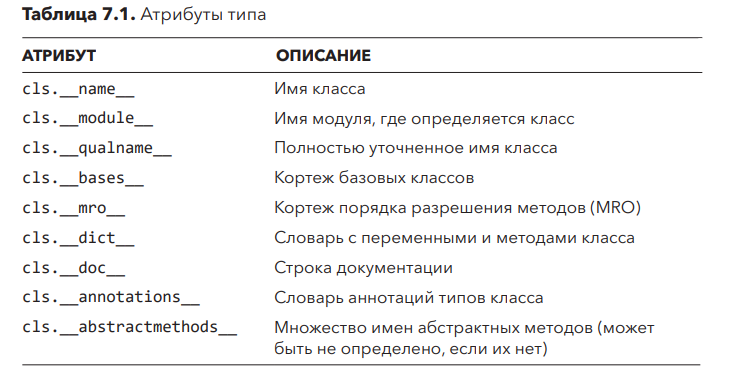

>Атрибут cls.__name__ содержит короткое имя класса. cls.__qualname__
содержит полностью уточненное имя с дополнительной информацией
о контексте среды (может быть полезно, если класс определяется внутри
функции или если вы создаете вложенное определение класса). Словарь
cls.__annotations__ содержит аннотации типов уровня класса (если они
есть).